## Association subtypes social task

In [1]:
import seaborn as sns
import os
import numpy as np
from scipy import stats, integrate
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set(color_codes=True)

In [3]:
path_root = "/home/yassinebha/Drive/HCP"
data_path = os.path.join(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_SOCIAL_mental_23-May-2017/associations/")

In [5]:
# Load pheno-subtype file

data = pd.read_csv(os.path.join(data_path,'mental_pheno_subtype.csv'))
data_clean = data.dropna() # remove nan's
data_clean.head()

,ID,sub1,sub2,sub3,sub4,sub5,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,...,FD_mean,Age_in_Yrs,Gender,Handedness,Mother_ID,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,HCP100307,0.459752,-0.555232,0.153332,0.535777,-0.523723,0.098119,0.098119,0.087372,0.087372,...,0.092746,27,2,95,51488,0.519920,-0.140835,-0.036111,-0.724333,-0.822086
1,HCP100408,-0.178156,0.249607,-0.211498,-0.161948,0.168952,0.103292,0.103292,0.135210,0.135210,...,0.119251,33,1,55,51730,0.089197,0.221858,-0.012569,1.038343,0.065596
2,HCP100610,0.247064,-0.211797,0.073554,0.138246,-0.236914,0.179657,0.179657,0.189551,0.189551,...,0.184604,27,1,85,52813,-0.364224,-0.195329,0.935079,0.458456,-0.515343
3,HCP101006,0.257360,-0.190840,0.072179,0.055416,-0.173153,0.145925,0.145925,0.124287,0.124287,...,0.135106,35,2,90,51283,0.034422,-0.308324,-0.522079,0.309493,-0.059245
4,HCP101107,-0.083170,0.072500,-0.064925,-0.038673,0.094867,0.158628,0.085494,0.120437,0.098313,...,0.139532,22,1,5,51969,0.198691,0.351150,-0.027434,0.118282,0.674487


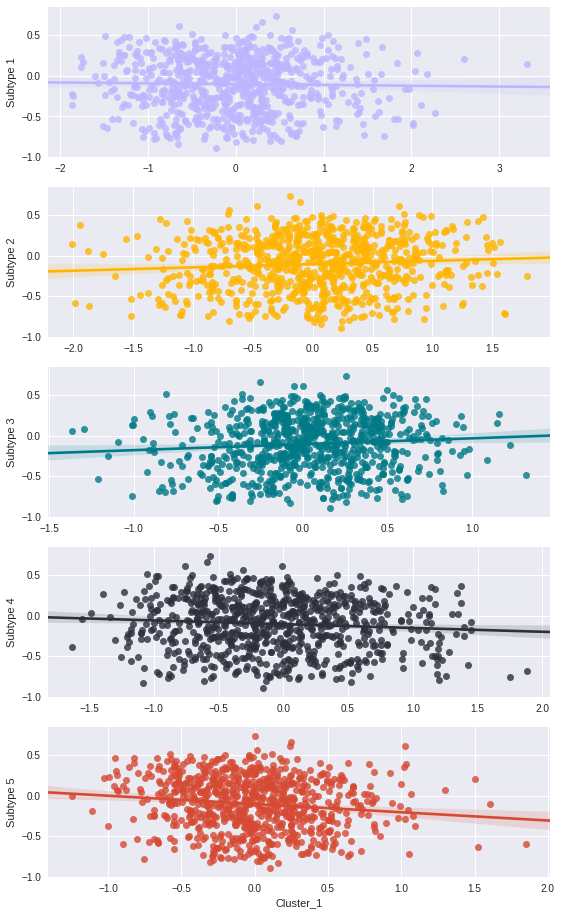

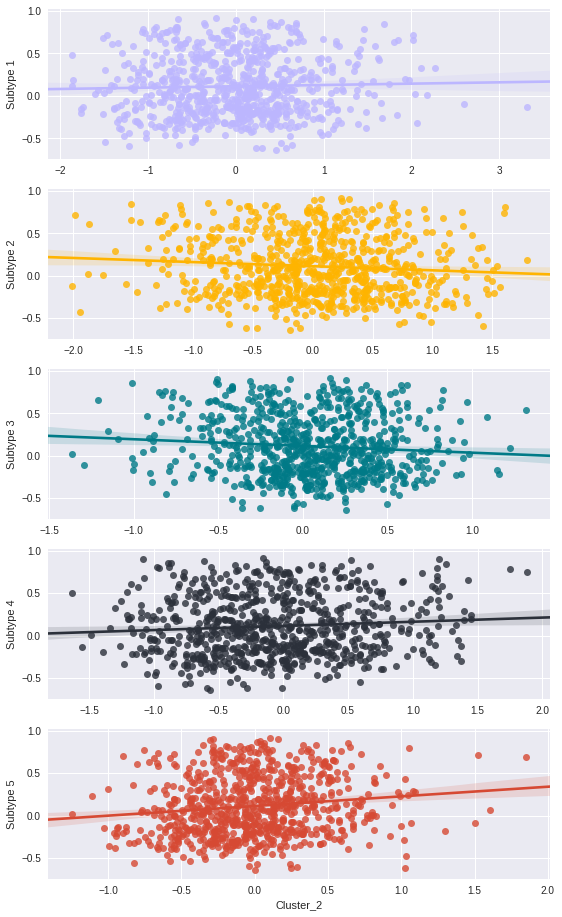

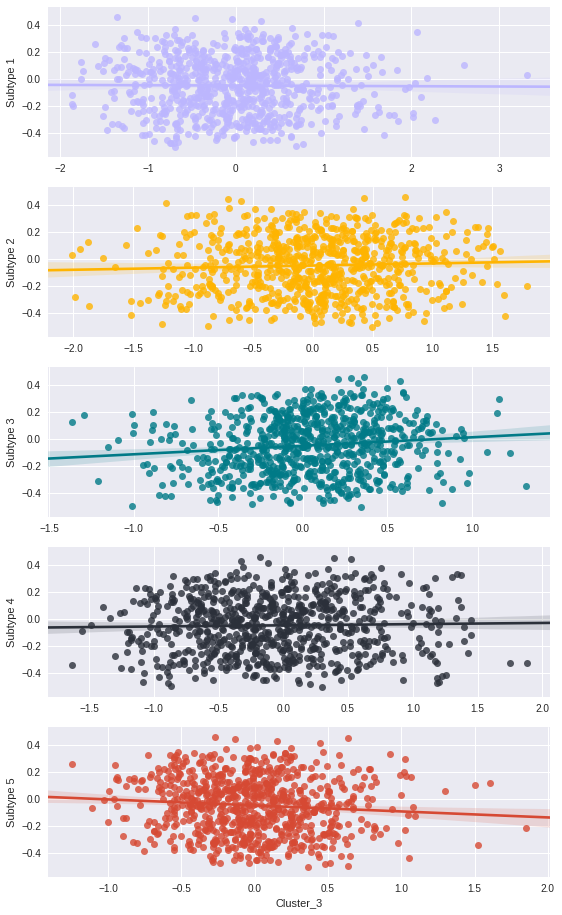

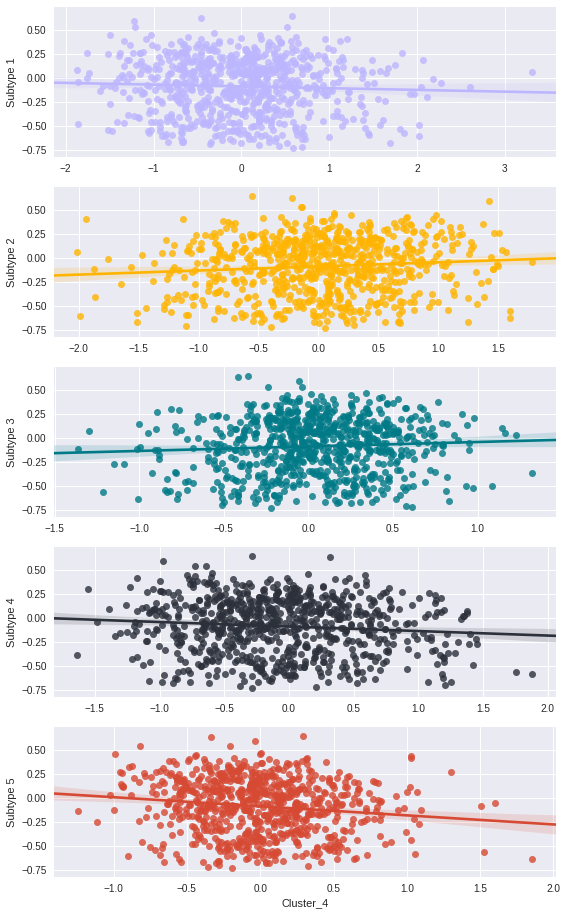

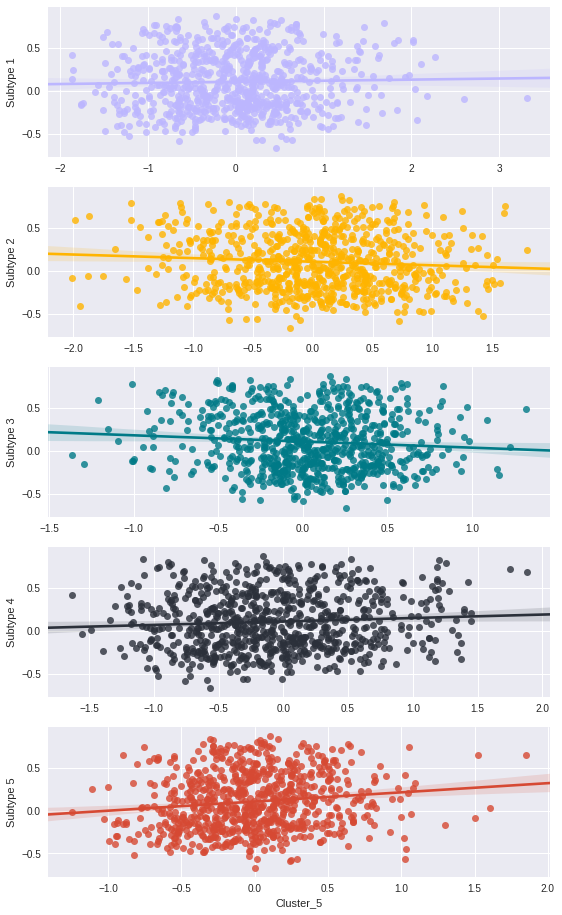

In [6]:
trial_list  = ['mental']
subt_list = ['sub1','sub2','sub3','sub4','sub5']
numb_cluter = 5
for trial in trial_list :
    data = pd.read_csv(os.path.join(data_path,'{}_pheno_subtype.csv'.format(trial)))
    data_clean = data.dropna() # remove nan's
    for idx, subt in enumerate(subt_list):

        fig = plt.figure(figsize=(9,16))
        ax1 = fig.add_subplot(511)
        ax1 = sns.regplot(x="cluster_1", y=subt, data=data_clean,color="#BCB6FF");
        ax1.set_ylabel('Subtype 1')
        ax1.set_xlabel('')

        ax2 = fig.add_subplot(512)
        ax2= sns.regplot(x="cluster_2", y=subt, data=data_clean,color="#ffb400");
        ax2.set_ylabel('Subtype 2')
        ax2.set_xlabel('')

        ax3 = fig.add_subplot(513)
        ax3= sns.regplot(x="cluster_3", y=subt, data=data_clean,color="#007a87");
        ax3.set_ylabel('Subtype 3')
        ax3.set_xlabel('')
        
        ax4 = fig.add_subplot(514)
        ax4= sns.regplot(x="cluster_4", y=subt, data=data_clean,color="#2B303A");
        ax4.set_ylabel('Subtype 4')
        ax4.set_xlabel('')
        
        ax5 = fig.add_subplot(515)
        ax5= sns.regplot(x="cluster_5", y=subt, data=data_clean,color="#D64933");
        ax5.set_ylabel('Subtype 5')
        ax5.set_xlabel('Cluster_{}'.format(idx+1))

        fig.savefig(os.path.join(data_path,"{}_pheno_association_{}.svg".format(trial,subt)))

In [ ]:
########################### Change kernel to R #############################

In [1]:
# first on terminal install cairo : "sudo apt install libcairo2-dev" then "sudo apt-get install r-cran-stringr"
#devtools::install_github("hadley/svglite")
#devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)

In [2]:
library(ggradar)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

Loading required package: ggplot2


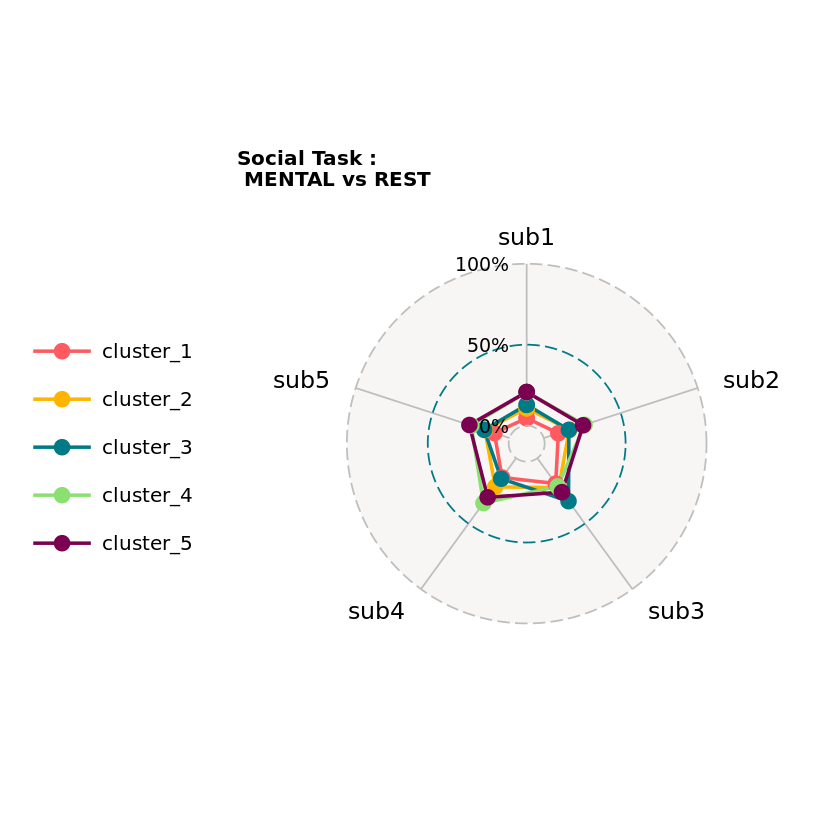

In [3]:
path_root = "/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_SOCIAL_mental_23-May-2017/"
list_trial <- list.dirs(paste(path_root,"networks/",sep = ''), full.names = FALSE,recursive=FALSE)
for (ii in list_trial) {
    MyData <- read.csv(file=paste(path_root,"associations/",ii,"_r2.csv",sep = ''))
    # plot R2 radar plot
    image_radar=ggradar(MyData, 
                        grid.min = 0,
                        grid.mid = 0.05, 
                        grid.max = 0.1, 
                        axis.label.size = 5, 
                        grid.label.size = 5 ,
                        legend.text.size =5,
                        group.line.width = 1,
                        group.point.size = 4)  +
    theme(legend.text = element_text(size = 12),plot.title = element_text( face="bold",size = 12)) + 
    ggtitle(paste(' Social Task : \n  ',toupper(ii),' vs REST',sep = ''))
    print(image_radar)
    ggsave(file=paste(path_root,"associations/",ii,"_R-squared.svg",sep = ''), plot=image_radar, width=10, height=8)
}